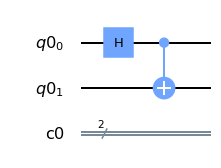

In [1]:
from qiskit import *
from qiskit_textbook.tools import array_to_latex

myQR = QuantumRegister(2)
myCR = ClassicalRegister(2)

Bell = QuantumCircuit(myQR, myCR)

Bell.h(myQR[0])
Bell.cx(myQR[0],myQR[1])

Bell.draw()

In [3]:
# Run the quantum circuit on a unitary simulator backend
unitBackend = Aer.get_backend('unitary_simulator')
# Create a Quantum Program for execution 
job = execute(Bell, unitBackend)
U = job.result().get_unitary(Bell,2)
#get_unitary(experiment, decimals)
print(U)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


In [4]:
array_to_latex(U, pretext="\\text{U} = ", precision=1)

<IPython.core.display.Math object>

In [5]:
initial_state = [1,0,0,0]

final_state = U@initial_state

array_to_latex(final_state, pretext="\\text{Unitary} = ", precision=1)

<IPython.core.display.Math object>

In [6]:
import numpy as np
from qiskit.aqua.operators import *
import qiskit.quantum_info as qi

In [7]:
qc6 = QuantumCircuit(1)
qc6.x(0)

qstate = qi.Operator(qc6)
array_to_latex(qstate.data)

<IPython.core.display.Math object>

In [9]:
qc6 = QuantumCircuit(1)
qc6.u2(0,np.pi,0)

qstate = qi.Operator(qc6)
array_to_latex(qstate.data)

<IPython.core.display.Math object>

In [11]:
qc6 = QuantumCircuit(1)
qc6.h(0)

qstate = qi.Operator(qc6)
array_to_latex(qstate.data)

<IPython.core.display.Math object>

In [47]:
operator = Z ^ Z  # ^ represents a tensor product 
operator = Z ^ 2  # same thing, computes Z ^ Z
operator = Z.tensorpower(2)  # same thing as Z ^ 2

In [48]:
print (operator)

ZZ


In [12]:
operator = Z

psi = One

expectation_value = (~psi @ operator @ psi).eval()
print("<1|Z|1> =", expectation_value.real)

psi = Zero

expectation_value = (~psi @ operator @ psi).eval()
print("<0|Z|0> =", expectation_value.real)

<1|Z|1> = -1.0
<0|Z|0> = 1.0


In [50]:
operator = Z ^ Z 

psi = 1 / np.sqrt(2) * ((One ^ Zero) + (Zero ^ One))

expectation_value = (~psi @ operator @ psi).eval()
print(expectation_value.real)  # -1.0

-0.9999999999999998
